# Training Models
* Generally, training a model means setting its parameters so that the model best fits the training set.
* Training a model means searching for a combination of model parameters that minimizes a cost function (over the training set).
    * It is a search in the model’s parameter space. The more parameters a model has, the more dimensions this space has, and the harder the search is.

# A. Linear Regression:

* Generally, a linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the **bias** term (also called the **intercept** term):

    * $\hat{y}\ =\ \theta_0\ +\ \theta_1x_1\ +\ ...\ +\ \theta_nx_n$ where:
        * $\hat{y}$ = predicted value.
        * $n$ = number of features.
        * $x_i$ = $i^{th}$ feature value.
        * $\theta_j$ = $j^{th}$ model parameter, including the bias term $\theta_0$ and the feature weights $\theta_1,\theta_2,...,\theta_n$.

    * In vectorized form: $\hat{y}\ =\ h_\theta(x)\ =\ \theta.x$, where:
        * $h_\theta$ = hypothesis function, using the model parameter $\theta$.
        * $\theta$ = model's parameter vector, containing the bias term $\theta_0$ and feature weights $\theta_1$ to $\theta_n$.
        * $x$ is the instance's feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
        * $\theta.x$ = dot product of the vectors $\theta$ and $x$, which is equal to $\theta_0x_0 +\theta_1x_1 + \theta_2x_2 +...+ \theta_nx_n$

* In machine learning, vectors are often represented as column vectors, which are 2D arrays with a single column.
    * If $\theta$ and $x$ are column vectors, then the prediction is $\hat{y}=\theta^Tx$ where $\theta^T$ is the transpose of $\theta$ (row vector instead of a column vector) and $\theta^Tx$ is the matrix multiplication of $\theta^T$ and $x$

* How to train a regression model?
    * Measure how well (or poorly) the model fits the training data. The most common performance measure of a regression model is the root mean square error (RMSE).
    * To train a linear regression model, find the value of $\theta$ that minimizes the RMSE.
        * In practice, it is simpler to minimize the mean squared error (MSE) than the RMSE, and it leads to the same result (because the value that minimizes a positive function also minimizes its square root).
    * The MSE of a linear regression hypothesis $h_\theta$ on a training set $X$ is calculated using:
        * $MSE(X,h_\theta)\ =\ \frac{1}{m}\sum_{i=1}^{m}(\theta^Tx^i\ -\ y^i)^2$ $\rightarrow$ MSE Cost function for a linear regression model

### A.1 Normal Equation:

* To find the value of $\theta$ that minimizes the MSE, there exists a closed-form solution, a mathematical equation that gives the result directly. This is called the **Normal equation**.
    * $\hat{\theta}=(X^TX)^{-1}\ X^T\ y$, where:
        * $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
        * $y$ is the vector of target values containing $y^1$ to $y^m$

* The sklearn `LinearRegression` class is based on the `scipy.linalg.lstsq()` function:
    * This function computes $\hat{\theta}=X^+y$, where $X^+$ is the pseudoinvers of $X$ (specifically, the Moore-Penrose inverse).
    * Also, you can use `np.linalg.pinv()` to compute the pseudoinverse directly.
    * The pseudoinverse itself is computed using a standard matrix factorization technique called singular value decomposition (SVD) that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U Σ V^T$ ( `numpy.linalg.svd()`).

In [2]:
import numpy as np

np.random.seed(42) 
m = 100 # number of instances
X = 2 * np.random.rand(m, 1) # column vector
y = 4 + 3 * X + np.random.randn(m, 1) # column vector

''

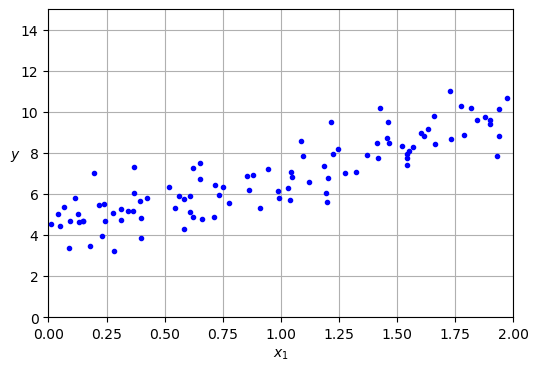

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
;

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x0 = 1 to each instance

# Normal Equation
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y # @ = np.matmul(..,..)
theta_best

array([[4.21509616],
       [2.77011339]])

In [5]:
# Make predictions using theta hat
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new) # add x0 = 1 to each instance
X_new_b

array([[1., 0.],
       [1., 2.]])

In [6]:
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

''

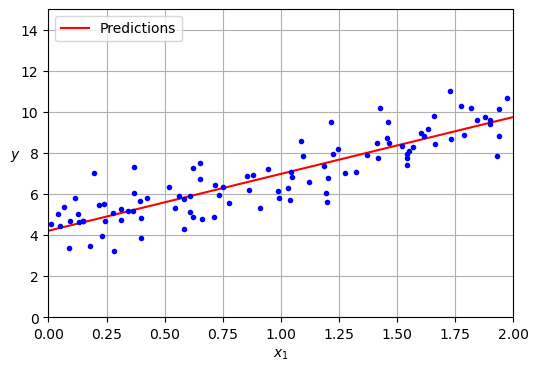

In [7]:
plt.figure(figsize=(6, 4)) 
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")
;

In [8]:
# Using Linear Regression from sklearn
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

### A.2. Computational Complexity

* Both the Normal equation and the SVD approach get very slow when the number of features grows large (e.g., 100,000). On the positive side, both are linear with regard to the number of instances in the training set (they are $O(m)$), so they handle large training sets efficiently, provided they can fit in memory.

* Once you have trained your linear regression model (using the Normal equation or any other algorithm), predictions are very fast: the computational complexity is linear with regard to both the number of instances you want to make predictions on and the number of features:
    * Making predictions on twice as many instances (or twice as many features) will take roughly twice as much time.

# B. Gradient Descent:

* Gradient descent is a generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of gradient descent is to tweak parameters iteratively in order to minimize a cost function:
    * It measures the local gradient of the error function with regard to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum.
    * In practice, you start by filling θ with random values (called random initialization). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.
    * ![Alt text](image-3.png)

* Learning Rate:
    * A hyperparameter in gradient descent that determines the size of the steps.
    * If too small, then the algorithm will have to go through many iterations to converge.
    * If too high, their is a high chance the algorithm will diverge , w/ larger and larger values, failing to find a good solution (minimum).

* Not all cost functions looks like regular bowsl. There may be holes, ridges, plateaus, and all sorts of irregular terrain, making convergence to the minimum difficult. 
    * Fortunately, the MSE cost function for a linear regression model happens to be a convex function, which means that if you pick any two points on the curve, the line segment joining them is never below the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.
        * Gradient descent is guaranteed to approach arbitrarily closely the global minimum (if you wait long enough and if the learning rate is not too high).

* While the cost function has the shape of a bowl, it can be an elongated bowl if the features have very different scales. When using gradient descent, you should ensure that all features have a similar scale (e.g., using Scikit-Learn’s StandardScaler class), or else it will take much longer to converge.
    * Gradient descent with (left) and w/o (right) feature scaling:
    * ![Alt text](image-4.png)

### B.1. Batch Gradient Descent:

* To implement gradient descent, you need to compute the gradient of the cost function with regard to each model parameter $\theta_j$.
    * Calculate how much the cost function will change if you change $\theta_j$ just a little bit.(*Partial Derivative*).
        * *What is the slope of the mountain under my feet if I face east? and then asking the same question facing different directions.*

* Partial derivatives of the cost function:
    * $\frac{\partial}{\partial \theta_j}MSE(\theta)\ =\ \frac{2}{m}\ \sum_{i=1}^{m}(\theta^Tx^i - y^i)x_j^i$

* Instead of computing these partial derivatives individually, use the gradient vector of the cost funtion to compute them all in one go.
    * The **gradient vector** contains all the partial derviates of the cost function (one for each model parameter):
        * $\LARGE \nabla_\theta MSE(\theta)\ =\ \begin{bmatrix} \frac{\partial}{\partial \theta_0}MSE(\theta)\\ \frac{\partial}{\partial \theta_1}MSE(\theta)\\ . \\. \\. \\ \frac{\partial}{\partial \theta_n}MSE(\theta)\\\end{bmatrix}\ =\ \frac{2}{m}X^T(X\theta - y)$

        * This formula involves calculations over the full training set X, at each gradient descent step. This is why the algorithm is called batch gradient descent: it uses the whole batch of training data at every step. As a result, it is terribly slow on very large training sets. However, gradient descent scales well with the number of features; training a linear regression model when there are hundreds of thousands of features is much faster using gradient descent than using the Normal equation or SVD decomposition.
    * Once you have the gradient vector, w/ points **uphill**, just go in the opposite direction to go downhill by subracting the product of `gradient vector` ($\nabla_\theta MSE(\theta)$) and `learning rate` ($\eta$) from $\theta$, this is the **Gradient Descent Step**:
        * $\theta^{next step}\ =\ \theta - \eta\nabla_\theta MSE(\theta)$

* To find a good learning rate, use grid search. However, limit the number of epochs so that grid search can eliminate models that take too long to converge.
    * If the number of epochs is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore.
    * A simple solution is to set a very large number of epochs but to interrupt the algorithm when the gradient vector becomes tiny—that is, when its norm becomes smaller than a tiny number $\epsilon$ (**tolerance**)—because this happens when gradient descent has (almost) reached the minimum.

* **Convergence Rate**:
    * When the cost function is convex and its slope does not change abruptly (as is the case for the MSE cost function), batch gradient descent with a fixed learning rate will eventually converge to the optimal solution, but you may have to wait a while: it can take $O(1/\epsilon)$ iterations to reach the optimum within a range of $\epsilon$, depending on the shape of the cost function.

In [12]:
n = 0.1 # learning rate
n_epochs = 1000
m = len(X_b) # Number of instances (rows)

np.random.seed(42)
# randomly initiale model parameters
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = (2 / m) * X_b.T @ (X_b @ theta - y)
    theta = theta - n * gradients

In [13]:
theta

array([[4.21509616],
       [2.77011339]])

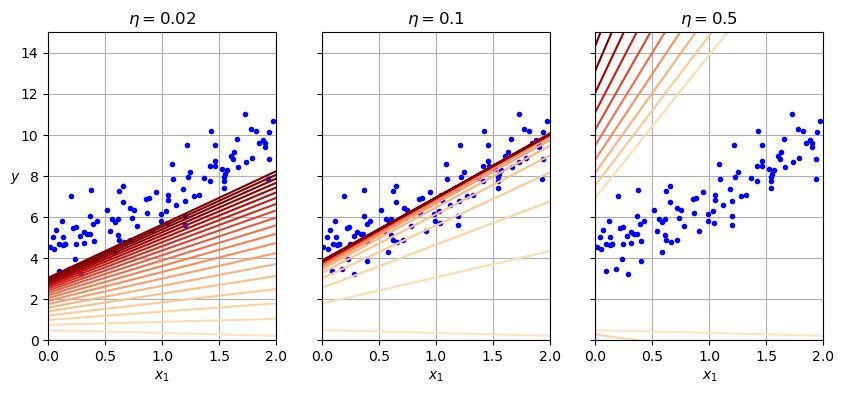

In [14]:
# Gradient Descent w/ various learning rates:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)
        theta = theta - eta * gradients
        theta_path.append(theta)
    plt.xlabel("$x_1$")
    plt.axis([0, 2, 0, 15])
    plt.grid()
    plt.title(fr"$\eta = {eta}$")
    return theta_path


np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

plt.figure(figsize=(10, 4))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])
plot_gradient_descent(theta, eta=0.5);

### B.2. Stochastic Gradient Descent:

* Stochastic gradient descent picks a random instance in the training set at every step and computes the gradients based only on that single instance.
    * Working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration.
    * It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (stochastic GD can be implemented as an out-of-core algorithm).

* Due to its stochastic (random) nature, this algorithm is much less regular than batch gradient descent: instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. Once the algorithm stops, the final parameter values will be good, but not optimal.
    * ![Alt text](image-5.png)

* When the cost function is very irregular, this can actually help the algorithm jump out of local minima, so stochastic gradient descent has a better chance of finding the global minimum than batch gradient descent does.
    * Therefore, randomness is a good escape from local optima, but bad because it means that the algorithm can never settle at the minimum.
    * One solution to this dilemma is to gradually reduce the learning rate. The steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum.
    * The function that determines the learning rate at each iteration is called the **learning schedule**.
        * If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum.
        * If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

* When using stochastic gradient descent, the training instances must be independent and identically distributed (IID) to ensure that the parameters get pulled toward the global optimum, on average. 
    * A simple way to ensure this is to shuffle the instances during training (e.g., pick each instance randomly, or shuffle the training set at the beginning of each epoch). If you do not shuffle the instances—for example, if the instances are sorted by label— then SGD will start by optimizing for one label, then the next, and so on, and it will not settle close to the global minimum.

* All Scikit-Learn estimators can be trained using the `fit()` method, but some estimators also have a `partial_fit()` method that you can call to run a single round of training on one or more instances (it ignores hyperparameters like `max_iter` or `tol`). Repeatedly calling `partial_fit()` will gradually train the model.
    * This is useful when controlling the training process.
    * Other models have a `warm_start` hyperparameter instead (and some have both):
        * If `warm_start=True`, calling the `fit()` method on a trained model will not reset the model; it will just continue training where it left off, respecting hyperparameters like max_iter and tol.
    * Note that `fit()` resets the iteration counter used by the learning schedule, while `partial_fit()` does not.

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
np.random.seed(42)
theta = np.random.randn(2, 1) # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi) # for SGD, do not divide by m
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

''

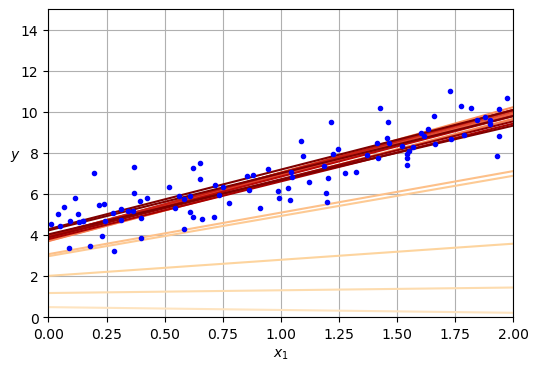

In [16]:
theta_path_sgd = [] 

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20 
plt.figure(figsize=(6, 4))  

for epoch in range(n_epochs):
    for iteration in range(m):

        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)  


plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
;

In [17]:
# sklearn's SGD Regressor

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel()) # fit expects a 1D array

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [18]:
sgd_reg.intercept_ # Bias

array([4.21278812])

In [19]:
sgd_reg.coef_ # Model Parameter

array([2.77270267])

### B.3 Mini-Batch Gradient Descent:

* At each step, instead of computing the gradients based on the full training set (as in batch GD) or based on just one instance (as in stochastic GD), mini-batch GD computes the gradients on small random sets of instances called mini-batches.

* Main advantage is a performance boost from hardware optimization of matrix operations, especially when using GPUs.
* The algorithm’s progress in parameter space is less erratic than with stochastic GD, especially with fairly large mini-batches. Mini-batch GD will end up walking around a bit closer to the minimum than stochastic GD—but it may be harder for it to escape from local minima (in the case of problems that suffer from local minima, unlike linear regression with the MSE cost function).

* Comparison of algorithms for linear regression:

* ![Alt text](image-6.png)

''

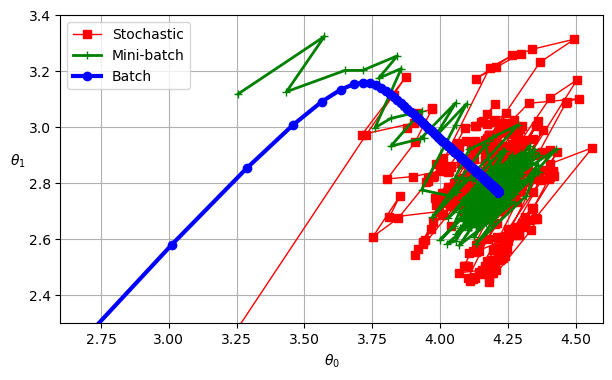

In [20]:
# paths taken by the three gradient descent algorithms in parameter space during training.
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
;

# C. Polynomial Regression:

* Polynomial Regression:
    * One simple way to fit a nonlinear data into a linear mode is to add powers of each features as new features, then train a linear model on this extended set of features.
    * When there are multiple features, polynomial regression is capable of finding relationships between features, which is something a plain linear regression model cannot do.

* `PolynomialFeatures`:
    * Transform data, adding a degree of each feature in the training set as a new feature.
    * Adds all combinations of features up to the given degree.
        * For example, if there were two features a and b, `PolynomialFeatures` with degree=3 would not only add the features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.
    * Transforms an array containing $n$ features into an array containing $\frac{(n+d)!}{d!n!}$ features. 

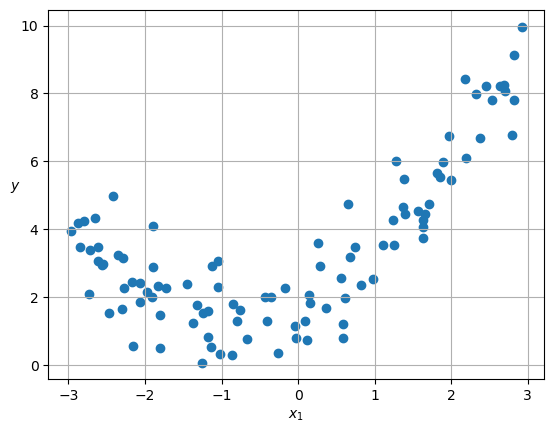

In [21]:
# Generate some nonlinear data - y = ax^2 + bx + c + noise

np.random.seed(42)
m = 100
X = 6*np.random.rand(m, 1) - 3
y = 0.5 * X **2 + X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.grid()

In [22]:
# add the square (2nd polynomial) of each feature in the training set as a new feature
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [23]:
X[0]

array([-0.75275929])

In [24]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_

array([1.78134581])

In [26]:
lin_reg.coef_

array([[0.93366893, 0.56456263]])

''

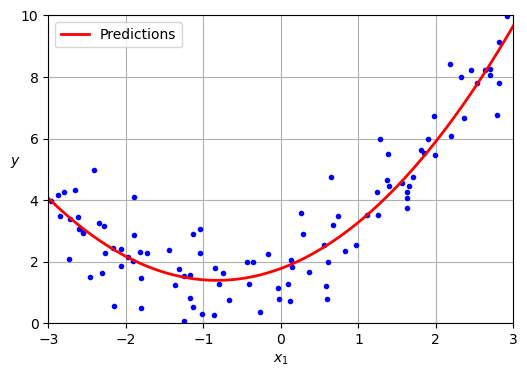

In [27]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
;

# D. Learning Curves:

* How can you decide how complex your model should be? How can you tell your model is overfitting or underfitting the data?
    * Using Cross-Validation to get an estimate of a model's generalization performance.
        * If a model performs well on the training data but generilizes poorly according to the cross-validation metrics then the model is OVERFITTING.
        * If it performs poorly on both (Training and Test set) then it is UNDERFITTING.
    * Looking at the Learning Curves.
        * Learning Curvers are plot of the model's training error and validation error as a function of the training iteration: just evaluate the model at regular intervals during training on both the training set and the validation set, and plot the results.
        * If the model cannot be trained incrementally (i.e., if it does not support `partial_fit()` or `warm_start`), then you must train it several times on gradually larger subsets of the training set.

* `learning_curve()` function:
    * Trains and evaluates the model using cross-validation.
    * By default it retrains the model on growing subsets of the training set, but if the model supports incremental learning you can set `exploit_incremental_learning=True` when calling `learning_curve()` and it will train the model incrementally instead.
    * The function returns the training set sizes at which it evaluated the model, and the training and validation scores it measured for each size and for each cross-validation fold.

    * The model is UNDERFITTING when the validation and training error curves have reached a plateau, close and has high RMSE.
        * If your model is underfitting the training data, adding more training examples will not help. You need to use a better model or come up with better features.
    
    * The model is OVERFITTING when there is a significant gap between the validation and training error curves and the training error curve is lower than the validation error curve.
        * One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

''

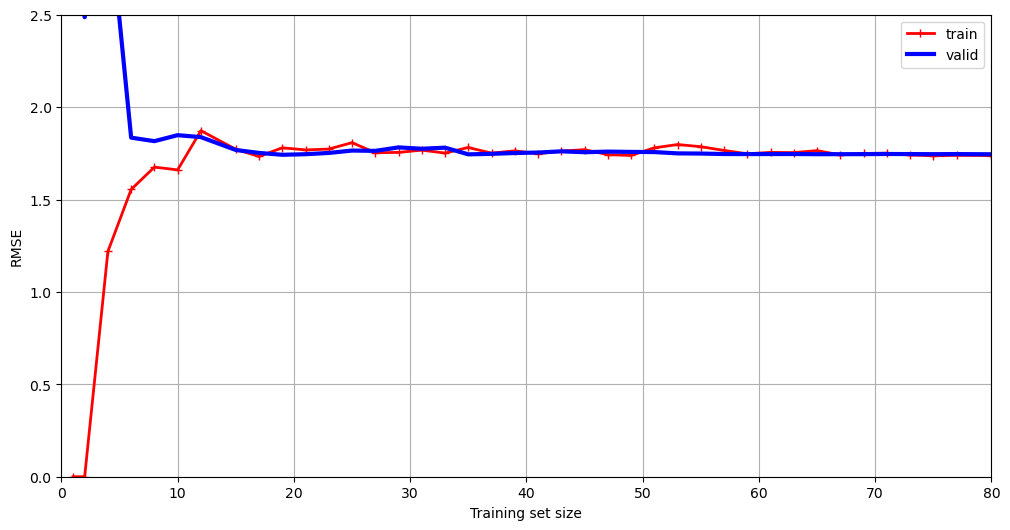

In [28]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), 
    X, y, 
    train_sizes=np.linspace(0.01, 1.0, 40), 
    cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)


plt.figure(figsize=(12, 6)) 
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
;

(0.0, 80.0, 0.0, 2.5)

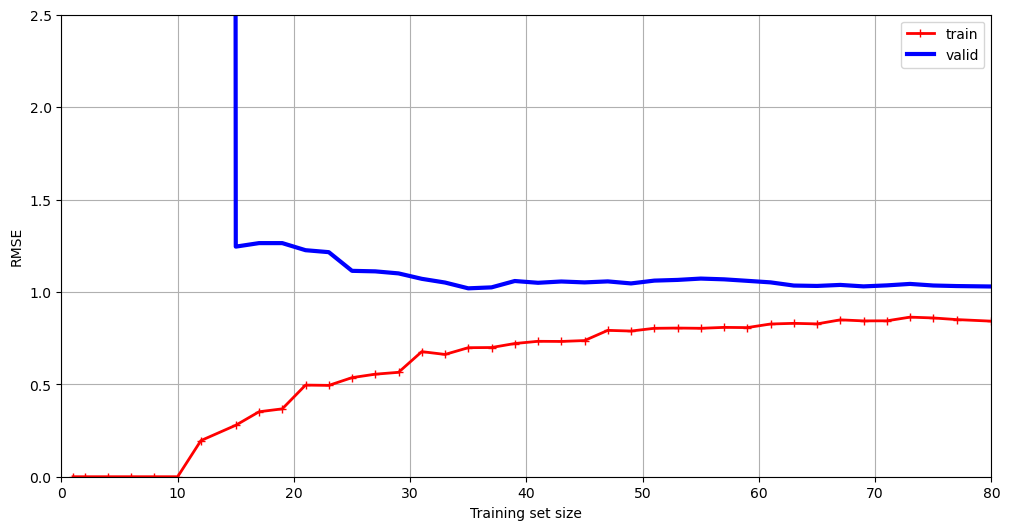

In [29]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, 
    X, y, 
    train_sizes=np.linspace(0.01, 1.0, 40), 
    cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(12, 6)) 
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])

### Bias/Variance Trade-Off

* An important theoretical result of statistics and machine learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors:
    * Bias:
        * This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

    * Variance:
        * This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.

    * Irreducible error:
        * This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

* **Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance.**

# E. Regularized Linear Model:

* A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. 
    * A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
    * For a linear model, regularization is typically achieved by constraining the weights of the model.

### E.1. Ridge Regression (Tikhonov regularization): 
* Ridge regression (also called Tikhonov regularization) is a regularized version of linear regression: 
    * A regularization term equal to $\frac{\alpha}{m}\sum^{n}_{i=1}\theta^{2}_{i}$ is added to the MSE.
        * $\alpha$ is the hyperparameter that controls how much the model is regularized.
        * If $\alpha=0$, then ridge regression is just a linear regression.
        * If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.
        * $\uparrow \ \alpha = \downarrow variance, \uparrow bias$
        * $\downarrow \ \alpha = \uparrow variance, \downarrow bias$
    * This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible.
    * The regularization term should only be added to the cost function during training. Once the model is trained, use the unregularized MSE (or the RMSE) to evaluate the model’s performance.

* Ridge Regression Cost Function:
    * $J(\theta) = MSE(\theta) + \frac{\alpha}{m}\sum^{n}_{i=1}\theta^{2}_{i}$ :
        * The bias term $\alpha_{0}$ is not regularized.
        * If we define $w$ as the vector of feature weights ($\theta_{1}$ to $\theta_{n}$), then the regularization term is equal to $\frac{\alpha(||\ w\ ||_{2})^{2}}{m}$ where $||\ w\ ||_{2}$ represents the $l_{2}$ norm of the weight vector.
    * For batch gradient descent, add $\frac{2\alpha w}{m}$ to the part of the MSE gradient vector that corresponds to the feature weights, w/o adding anything to the gradient of the bias term.
 
* It is important to scale the data (e.g., using a `StandardScaler`) before performing ridge regression, as it is sensitive to the scale of the input features. This is true of most regularized models.

* As with linear regression, we can perform ridge regression either by computing a closed-form equation or by performing gradient descent:
    * Ridge Regression Closed-form solution:
        * $\hat{\theta}\ =\ (X^TX + \alpha A)^{-1}\ X^T\ y$

* Performing ridge regression w/ SGD : `SGDRegressor`
    * `penalty` sets the type of regularization term to use, alternatively you can use the Ridge class with the `"sag"` solver. Stochastic average GD is a variant of stochastic GD.
        * `"l2"` indicates that you want SGD to add a regularization term to the MSE cost function equal to `alpha` times the square of $l2$ norm of the weight vector.
    
* `RidgeCV`:
    * performs ridge regression, but it automatically tunes hyperparameters using cross-validation. It's roughly equivalent to using `GridSearchCV` but it's optimized for ridge regression and runs much faster.
    * Serveral other estimators (mostly linear) also have efficient CV variants, such as `LassoCV` and `ElasticNetCV`.

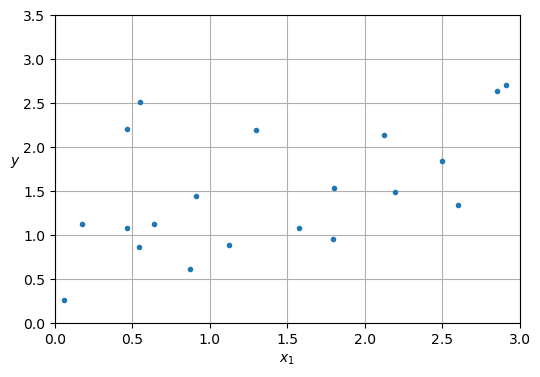

In [30]:
# Generat noisy small linear dataset
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid();

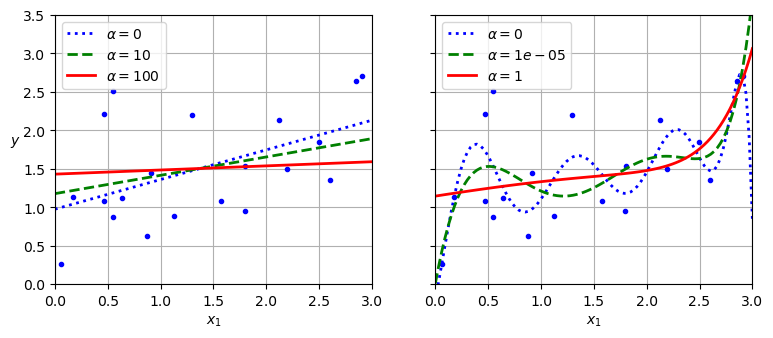

In [31]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

In [32]:
# ridge regression using a closed-form solution by Andre-Louis Cholesky
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55325833]])

In [33]:
# rdige regression w/ stochastic gradient descent

sgd_reg = SGDRegressor(penalty="l2", alpha=0.1/m, tol=None, max_iter=1000, eta0=0.1, random_state=42)

sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.54867902])

### E.2. Lasso Regression:

* Least Absolute Shrinkage and Selection Operator Regression (LASSO) is another regularized version of linear regression: just like ridge regression, it adds a regularization term to the cost function, but it uses the $l1$ norm of the weight vector instead of the square of the $l1$ norm.

* An important characteristic of lasso regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero).
    * Lasso regression automatically performs feature selection and outputs a sparse model w/ few nonzero feature weights.

* Lasso Regression Cost Function:
    * $J(\theta) = MSE(\theta) + 2\alpha\sum^{n}_{i=1}|\theta{i}|$ 

* To keep gradient descent from bouncing around the optimum at the end when using lasso regression, you need to gradually reduce the learning rate during training. It will still bounce around the optimum, but the steps will get smaller and smaller, so it will converge.

''

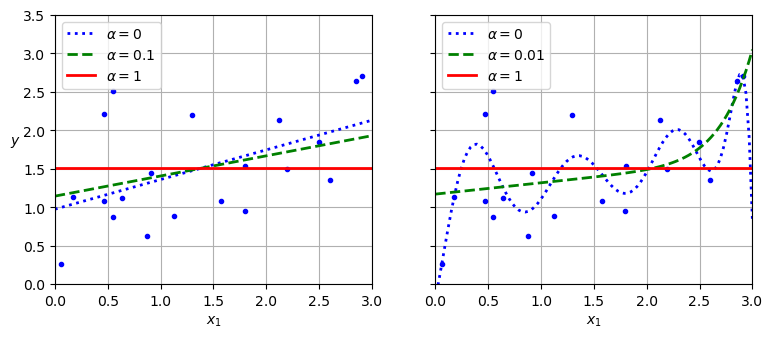

In [34]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
;

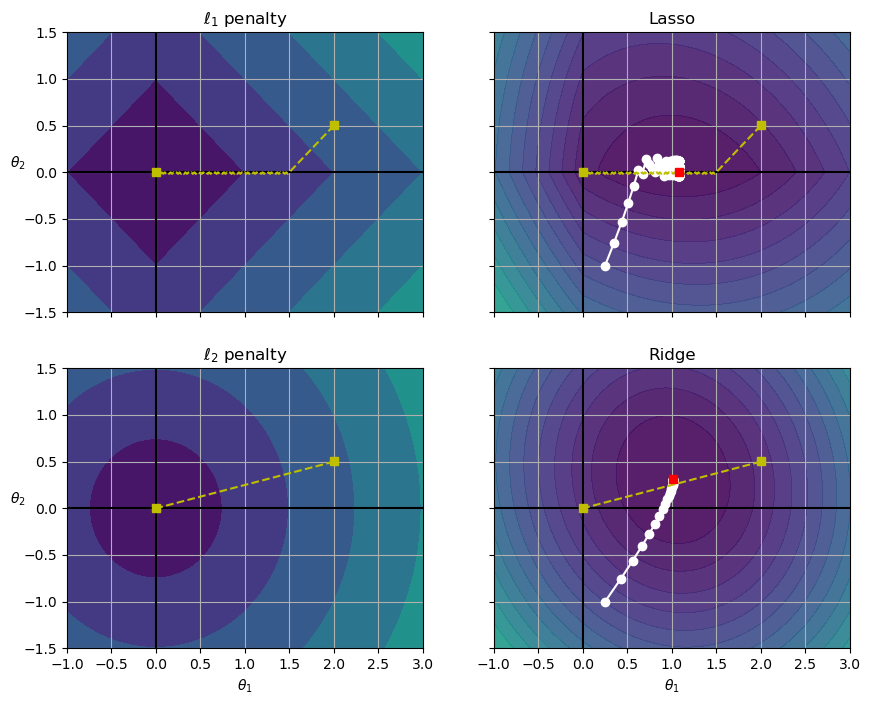

In [35]:
# Lasso Versus Ridge Regularization
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

### E.3. Elastic Net Regression:

* Elastic net regression is a middle ground between ridge regression and lasso regression. The regularization term is a weighted sum of both ridge and lasso’s regularization terms, and you can control the mix ratio $r$.
    * When $r\ =\ 0$, elastic net is equivalent to ridge regression.
    * When $r\ =\ 1$, elastic net is equivalent to lasso regression.

* Elastic Net Cost Function:
    * $J(\theta) = MSE(\theta) + r(2\alpha\sum^{n}_{i=1}|\theta{i}|) + (1-r)(\frac{\alpha}{m}\sum^{n}_{i=1}\theta^{2}_{i})$ 

* When to use elastic net regression ,ridge, lasso or plain regression?
    * It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain linear regression.
    * Ridge is a good default, but if only a few features are useful, you should prefer lasso or elastic net because they tend to reduce the useless features’ weights down to zero. 
    * In general, elastic net is preferred over lasso because lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

In [36]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### E.4. Early Stopping:

* A very different way to regularize iterative learning algorithms such as gradient descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.

* With stochastic and mini-batch gradient descent, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not. One solution is to stop only after the validation error has been above the minimum for some time (when you are confident that the model will not do any better), then roll back the model parameters to the point where the validation error was at a minimum.

''

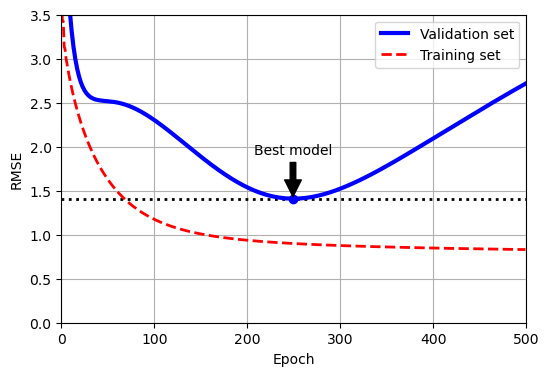

In [37]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], [] 

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = mean_squared_error(y_train, y_train_predict, squared=False)
    val_errors.append(val_error)
    train_errors.append(train_error)

best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
;

# F. Logistic Regression:

* Logistic regression (also called logit regression) is commonly used to estimate the probability that an instance belongs to a particular class (e g., what is the probability that this email is spam?).

* If the estimated probability is greater than a given threshold (typically 50%), then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”). This makes it a binary classifier.

### F.1. Estimating Probabilities:

* Just like a linear regression model, a logistic regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the linear regression model does, it outputs the logistic of this result.
    * Logistic Regression model estimated probability (vectorized form):
        * $\hat{p}\ =\ h_{\theta}(x)\ =\ \sigma(\theta^{T}x)$
        * The logistic , $\sigma(.)$, is a *sigmoid function* that outputs a number between 0 and 1.
            * $\sigma(t)\ =\ \frac{1}{1+e^{-t}}$
            * ![Alt text](image-7.png)
        * Once the logistic regression model has estimated the probability $\hat{p}\ =\ h_{\theta}(x)\$ that an instance $x$ belongs to the positive class, it can make its prediction, $\hat{y}$:
            * Example, Logistic regression model prediction using a 50% threshold probability:
            * $\Large \hat{y}\ =\LARGE \ \{_{1\ if\ \hat{p}\ \geq\ 0.5}^{0\ if\ \hat{p}\ \leq\ 0.5} $
            * When $t\ <\ 0$ then $\sigma(t)\ <0.5$, and when $t\ \geq\ 0$ then $\sigma(t)\ \geq 0.5$
            * The score t is often called the logit. The logit is also called the log-odds, since it is the log of the ratio between the estimated probability for the positive class and the estimated probability for the negative class.